# Proyecto final de Python para Data Science
## Estudiante: Erick J. Pineda Amézquita
## Carnet:        17012140

Problema a resolver:

Crear un modelo lineal univariable para predecir el precio de casas en base a variables obtenidas, según los valores proporcionados en el archivo: "proyecto_training_data.npy"


#### Importar paquetes/librerías a utilizar:

In [1]:
import numpy as np
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt
from seaborn import lmplot


Extracción de los datos a partir del archivo .npy

In [2]:
origenDeDatos = np.load('proyecto_training_data.npy')
type(origenDeDatos)

##np.savetxt("data.txt", OrigenDeDatos.tolist())
##OrigenDeDatos.tolist()


numpy.ndarray

### Separación de los datos en 80% y 20%

In [3]:
numDatosEntrenamiento=int(0.8*origenDeDatos.shape[0])
print("Cantidad de datos para ENTRENAMIENTO:   ", numDatosEntrenamiento)

numDatosValidacion=int(0.2*origenDeDatos.shape[0])
print("Cantidad de datos para VALIDACION:      ", numDatosValidacion)


Cantidad de datos para ENTRENAMIENTO:    1168
Cantidad de datos para VALIDACION:       292


#### Creación de Data Frames

In [4]:
dfEntrenamiento = pd.DataFrame(origenDeDatos[:numDatosEntrenamiento])
dfEntrenamiento.columns = ["SalePrice", "Overall", "Floor", "Rooms", "Year", "Front"]

dfValidacion = pd.DataFrame(origenDeDatos[numDatosEntrenamiento:])
dfValidacion.columns = ["SalePrice", "Overall", "Floor", "Rooms", "Year", "Front"]

print("Data Frame de Entrenamiento:   ",dfEntrenamiento.shape)
print("Data Frame de Validacion:      ",dfValidacion.shape)


Data Frame de Entrenamiento:    (1168, 6)
Data Frame de Validacion:       (292, 6)


#### Presentación de datos para ver como vienen

In [5]:
dfEntrenamiento.head(2)

,SalePrice,Overall,Floor,Rooms,Year,Front
0,208500.0,7.0,856.0,8.0,2003.0,65.0
1,181500.0,6.0,1262.0,6.0,1976.0,80.0


#### Analitica de datos por medio de estadística

In [6]:
dfEntrenamiento.describe()

,SalePrice,Overall,Floor,Rooms,Year,Front
count,1168.000000,1168.000000,1168.000000,1168.000000,1168.000000,962.000000
mean,180590.277397,6.101027,1156.323630,6.485445,1971.451199,69.946985
std,78815.697902,1.378025,373.780374,1.609141,29.951707,23.478161
min,34900.000000,1.000000,334.000000,2.000000,1875.000000,21.000000
25%,129900.000000,5.000000,882.000000,5.000000,1954.000000,59.000000
50%,162950.000000,6.000000,1086.000000,6.000000,1973.000000,70.000000
75%,214000.000000,7.000000,1390.250000,7.000000,2000.000000,80.000000
max,755000.000000,10.000000,3228.000000,14.000000,2010.000000,313.000000


#### Media, minimo, maximo, rangos

In [7]:
dfEntrenamiento.mean(axis=0)


SalePrice    180590.277397
Overall           6.101027
Floor          1156.323630
Rooms             6.485445
Year           1971.451199
Front            69.946985
dtype: float64

In [8]:
dfEntrenamiento.min(axis=0)


SalePrice    34900.0
Overall          1.0
Floor          334.0
Rooms            2.0
Year          1875.0
Front           21.0
dtype: float64

In [9]:
dfEntrenamiento.max(axis=0)


SalePrice    755000.0
Overall          10.0
Floor          3228.0
Rooms            14.0
Year           2010.0
Front           313.0
dtype: float64

In [10]:
dfEntrenamiento.std(axis=0)


SalePrice    78815.697902
Overall          1.378025
Floor          373.780374
Rooms            1.609141
Year            29.951707
Front           23.478161
dtype: float64

#### Correlación entre todas las variables

In [11]:
dfEntrenamiento.corr()


,SalePrice,Overall,Floor,Rooms,Year,Front
SalePrice,1.000000,0.793990,0.616289,0.564707,0.534171,0.363292
Overall,0.793990,1.000000,0.469411,0.444293,0.567313,0.242420
Floor,0.616289,0.469411,1.000000,0.409318,0.292074,0.417388
Rooms,0.564707,0.444293,0.409318,1.000000,0.122911,0.341005
Year,0.534171,0.567313,0.292074,0.122911,1.000000,0.121474
Front,0.363292,0.242420,0.417388,0.341005,0.121474,1.000000


#### Rangos


In [12]:
print ("Intervalo SalePrice:   [", dfEntrenamiento["SalePrice"].min(),"  -   ",dfEntrenamiento["SalePrice"].max(), "]")
print ("Intervalo Overall:     [", dfEntrenamiento["Overall"].min(),"  -   ",dfEntrenamiento["SalePrice"].max(), "]")
print ("Intervalo Floor:       [", dfEntrenamiento["Floor"].min(),"  -   ",dfEntrenamiento["SalePrice"].max(), "]")
print ("Intervalo Rooms:       [", dfEntrenamiento["Rooms"].min(),"  -   ",dfEntrenamiento["SalePrice"].max(), "]")
print ("Intervalo Year:        [", dfEntrenamiento["Year"].min(),"  -   ",dfEntrenamiento["SalePrice"].max(), "]")
print ("Intervalo Front:       [", dfEntrenamiento["Front"].min(),"  -   ",dfEntrenamiento["SalePrice"].max(), "]")



Intervalo SalePrice:   [ 34900.0   -    755000.0 ]
Intervalo Overall:     [ 1.0   -    755000.0 ]
Intervalo Floor:       [ 334.0   -    755000.0 ]
Intervalo Rooms:       [ 2.0   -    755000.0 ]
Intervalo Year:        [ 1875.0   -    755000.0 ]
Intervalo Front:       [ 21.0   -    755000.0 ]


##  Graficas de cada Variable. Histogramas

C:\ProgramData\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


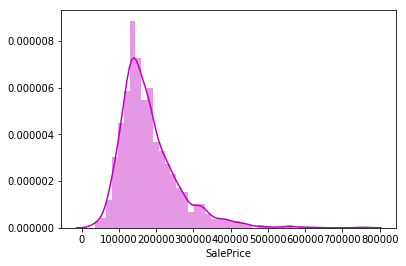

In [13]:
#sns.distplot(dfEntrenamiento["SalePrice"], hist=False, color="g", kde_kws={"shade": True})
sns.distplot(dfEntrenamiento["SalePrice"], color="m")


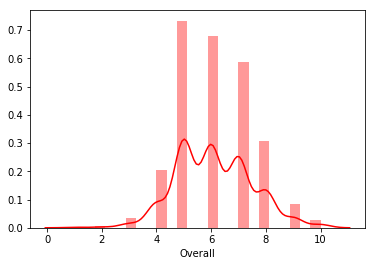

In [14]:
sns.distplot(dfEntrenamiento["Overall"], color="r")


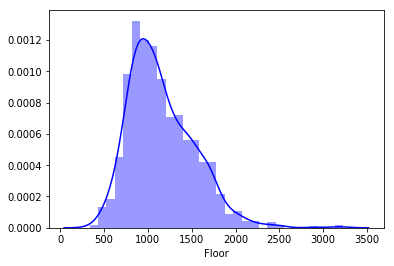

In [15]:
sns.distplot(dfEntrenamiento["Floor"], color="b")


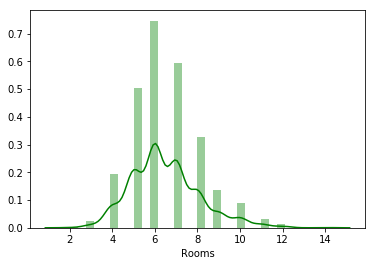

In [16]:
sns.distplot(dfEntrenamiento["Rooms"], color="g")


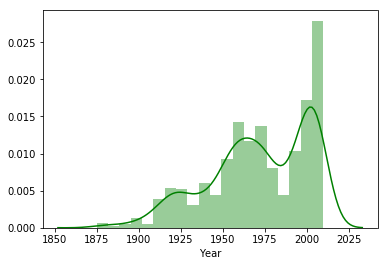

In [17]:
sns.distplot(dfEntrenamiento["Year"], color="g",bins=20)


C:\ProgramData\Anaconda3\lib\site-packages\numpy\lib\histograms.py:754: RuntimeWarning: invalid value encountered in greater_equal
  keep = (tmp_a >= first_edge)
C:\ProgramData\Anaconda3\lib\site-packages\numpy\lib\histograms.py:755: RuntimeWarning: invalid value encountered in less_equal
  keep &= (tmp_a <= last_edge)
C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\nonparametric\kde.py:448: RuntimeWarning: invalid value encountered in greater
  X = X[np.logical_and(X > clip[0], X < clip[1])] # won't work for two columns.
C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\nonparametric\kde.py:448: RuntimeWarning: invalid value encountered in less
  X = X[np.logical_and(X > clip[0], X < clip[1])] # won't work for two columns.


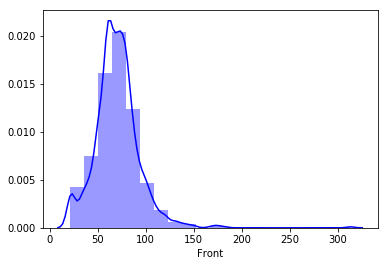

In [18]:
sns.distplot(dfEntrenamiento["Front"], color="b",bins=20)



# Graficas X,Y para observar el comportamiento del precio y sus variables

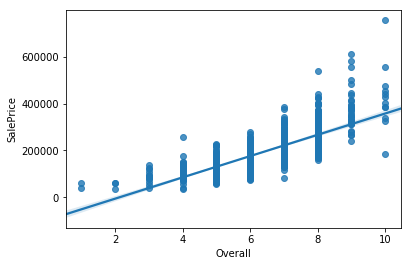

In [19]:
ax = sns.regplot(x="Overall", y="SalePrice", data=dfEntrenamiento)

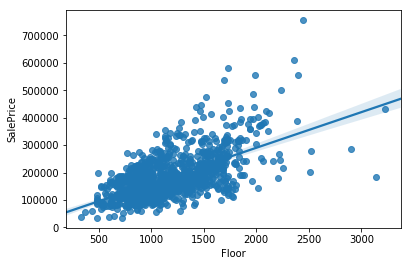

In [20]:
ax = sns.regplot(x="Floor", y="SalePrice", data=dfEntrenamiento)

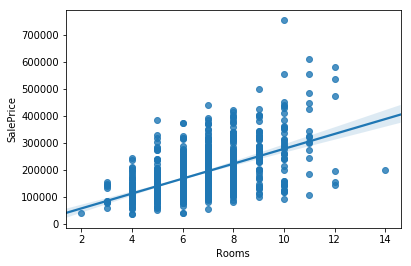

In [21]:
ax = sns.regplot(x="Rooms", y="SalePrice", data=dfEntrenamiento)

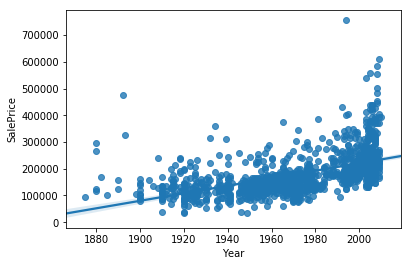

In [22]:
ax = sns.regplot(x="Year", y="SalePrice", data=dfEntrenamiento)

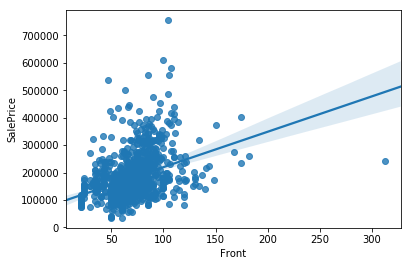

In [23]:
ax = sns.regplot(x="Front", y="SalePrice", data=dfEntrenamiento)

### Funcion de entrenamiento manual

## Se tomarán las 2 graficas: Overall y Floor, segun la tendencia de las mismas

In [24]:
def regresionLineal(argX, argY, EPOCHS, imprimir_error_cada, lr):
    ##mb=np.array([0.1,0.2])
    mb=np.array([27000,96199])
    unos = np.ones_like(argX)
    arrXUnos=np.column_stack((argX,unos))
    yhat=np.dot(arrXUnos,mb)
    
    
    ##error= 0.5*promedio*(argY-yhat)**2
    ### Para obtener la función de promedio, se va a dividir en dos unidades:
    ## La función según el texto es: error=1/2 * promedio ((y - yhat)**2)
    arrError= 0.5*(0.5*(argY-yhat)**2)
    
    
    return arrError
regresionLineal(dfEntrenamiento["Overall"], dfEntrenamiento["SalePrice"], 0, 0, 0)

##sh=regresionLineal(dfEntrenamiento["Overall"], dfEntrenamiento["SalePrice"], 0, 0, 0)


0       1.470684e+09
1       1.470684e+09
2       9.516917e+08
3       5.270687e+09
4       9.671789e+08
5       1.944766e+09
6       6.757400e+06
7       1.814717e+09
8       6.029445e+09
9       3.203503e+09
10      2.585672e+09
11      8.412900e+06
12      1.900916e+09
13      8.119650e+06
14      2.560309e+09
15      5.867483e+09
16      2.981105e+09
17      3.260353e+09
18      1.303174e+09
19      2.125164e+09
20      4.290905e+07
21      5.314337e+09
22      1.689169e+09
23      2.565372e+09
24      1.489921e+09
25      7.811746e+08
26      2.323192e+09
27      9.606900e+06
28      1.404107e+08
29      4.603555e+09
            ...     
1138    9.671789e+08
1139    1.900916e+09
1140    2.125164e+09
1141    2.839057e+08
1142    3.173689e+09
1143    5.715284e+09
1144    3.856348e+09
1145    1.689169e+09
1146    1.528771e+09
1147    3.063567e+09
1148    7.081138e+09
1149    5.055139e+09
1150    4.502343e+09
1151    1.652382e+09
1152    1.987959e+08
1153    4.740254e+09
1154    1.738

In [25]:
r=np.array([0.1,0.2])
unos = np.ones_like(dfEntrenamiento["Overall"])
arrXUnos=np.column_stack((dfEntrenamiento["Overall"],unos))
    
r
t=np.dot(arrXUnos,r)
t.shape


error=0.5*

SyntaxError: invalid syntax (<ipython-input-25-88c8dea4e51b>, line 10)

In [ ]:
# lmplot(x, y, data=dsDatosEntrenamiento, fit_reg=False)
#dsDatosEntrenamiento.columns = ["Sequence", "Start", "End", "Coverage"]
##arrPrecio=dsDatosEntrenamiento[:,0]
##arrOver=dsDatosEntrenamiento[:,1]
##arrFloor=dsDatosEntrenamiento[:,2]
##arrRooms=dsDatosEntrenamiento[:,3]
##arrYear=dsDatosEntrenamiento[:,4]
##arrFront=dsDatosEntrenamiento[:,5]


##mediaPrecio=np.mean(dsPrecio)
##minPrecio=np.min(dsPrecio)
##maxPrecio=np.max(dsPrecio)
##stdPrecio=np.std(dsPrecio)

##dsOverallQual=dsDatosEntrenamiento[:,1]
##mediaOverallQual=np.mean(dsOverallQual)
##minOverallQual=np.min(dsOverallQual)
##maxOverallQual=np.max(dsOverallQual)
##stdOverallQual=np.std(dsOverallQual)
##print(mediaOverallQual)
##print(minOverallQual)
##print(maxOverallQual)
##print(stdOverallQual)


